Text(0.5, 1.0, 'Stationarity and Root Type Regions for AR(2) Process')

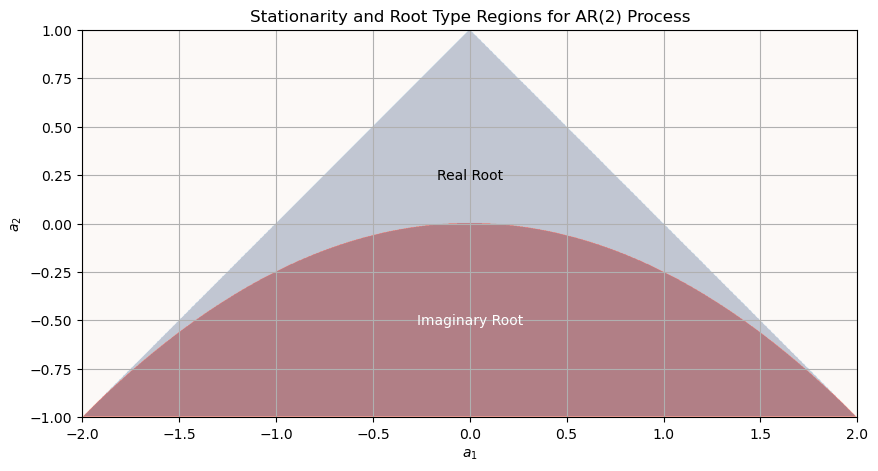

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range for a1 and a2
a1_range = np.linspace(-2, 2, 1000)
a2_range = np.linspace(-1, 1, 1000)

# Create a grid of a1 and a2 values
A1, A2 = np.meshgrid(a1_range, a2_range)

# Define the stationarity conditions directly as arrays
real_part = (A2 + A1 < 1) & (np.abs(A2) < 1) & (A2 + A1**2 / 4 > 0) & (A2 - A1 < 1)
imaginary_part = (A2 + A1 < 1) & (np.abs(A2) < 1) & (A2 + A1**2 / 4 < 0) & (A2 - A1 < 1)

# Create the plot
plt.figure(figsize=(10, 7))

# Plot the regions
# The `extent` parameter maps the axes ranges to the matrix
plt.imshow(real_part, extent=(a1_range.min(), a1_range.max(), a2_range.min(), a2_range.max()), origin='lower', cmap='Blues', alpha=0.5)
plt.imshow(imaginary_part, extent=(a1_range.min(), a1_range.max(), a2_range.min(), a2_range.max()), origin='lower', cmap='Reds', alpha=0.5)

# Add annotations for real and imaginary roots
plt.annotate('Real Root', xy=(0, 0.25), ha='center', va='center', color='black')
plt.annotate('Imaginary Root', xy=(0, -0.5), ha='center', va='center', color='white')
plt.grid(True)
plt.xlabel(r'$a_1$')
plt.ylabel(r'$a_2$')
plt.title('Stationarity and Root Type Regions for AR(2) Process')


#### stationarity condition for AR(2)

For AR(2) with parameters $a_1, a_2$ the stationarity condition is：

$ a_2 \pm a_1 < 1, \quad |a_2| < 1. $

#### Proof:

To make sure the unit root is out of the unit circle， $ z_1, z_2 $ should satisfy $ \sqrt{a^2 + b^2} > 1 $。Characteristic equation $ A(z) $ is $ 1 - a_1z - a_2z^2 = 0 $ ，the discriminant equation is：

$ \Delta = a_1^2 + 4a_2 < 0 \quad \Rightarrow \quad a_2 < \frac{-a_1^2}{4} $

#### Image roots: <br> 
if the roots are $ z_1 = a + ib $，$ z_2 = a - ib $：

$ z_1z_2 = (a + ib)(a - ib) = a^2 + b^2 = \frac{1}{-a_2} \quad \Rightarrow \quad  -1 < a_2 < 0 $,<br>
To conclude,$ -1 < a_2 < \frac{-a_1^2}{4} \leq 0, \quad |a_1| < 2. $<br>

#### Real roots:<br>
First of all, $ \Delta = a_1^2 + 4a_2 > 0 $, Notice that A(0)=1, so to promise the absolute value of two roots are larger than 1, it is required that A(1)>0 and A(2)>0, which means $ a_2 + a_1 < 1 $ and $ a_2 - a_1 < 1 $<br>

#### Combining the two parts, we finish our proof.




#### 6

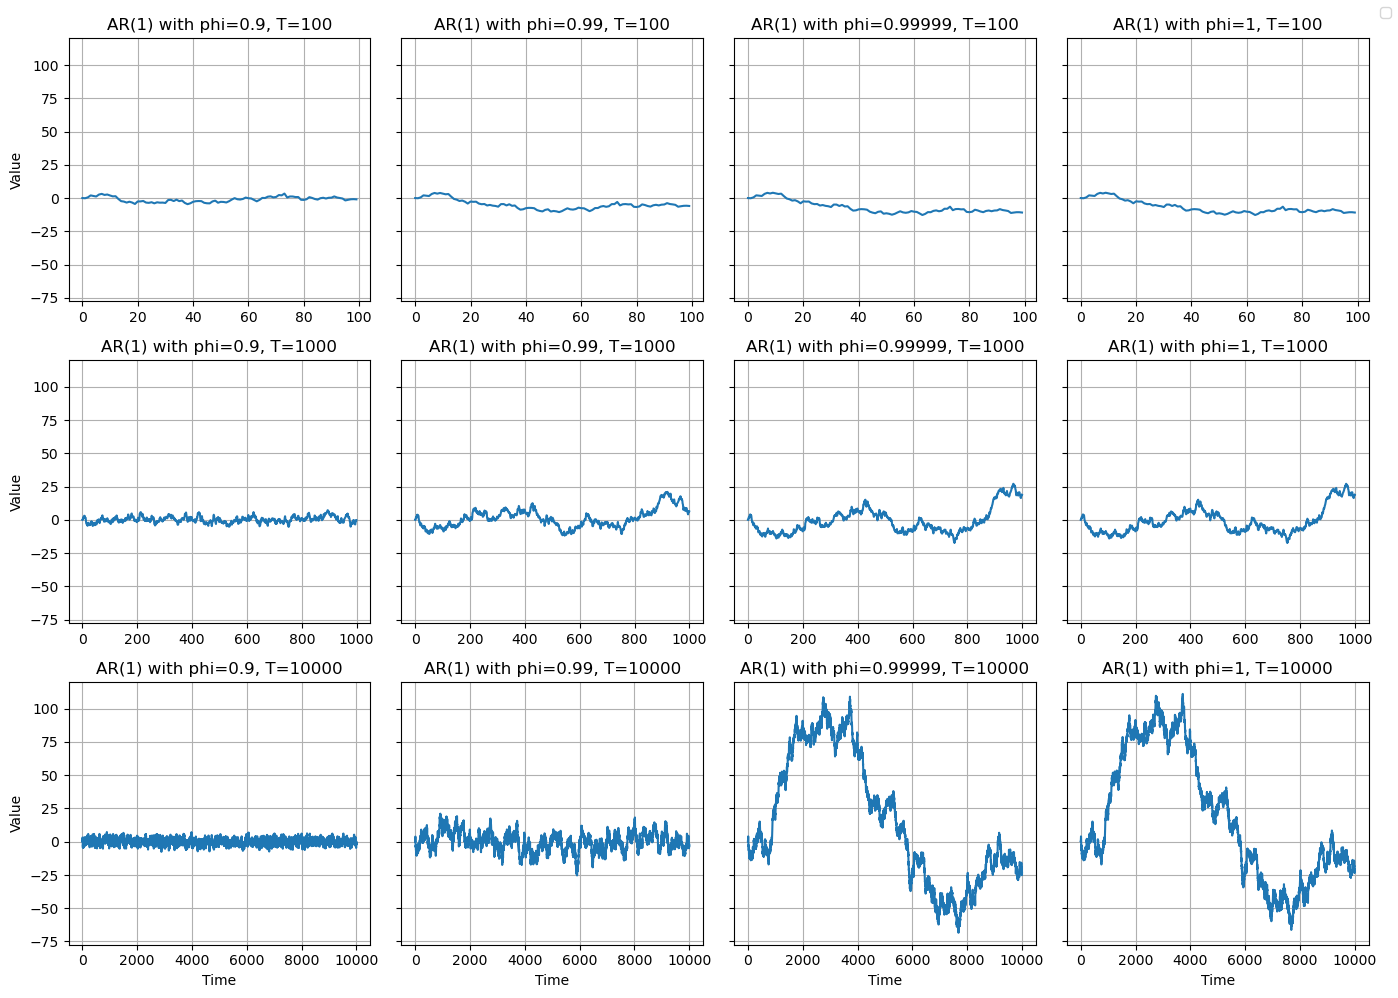

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Simulation parameters
phis = [0.9, 0.99, 0.99999, 1]
sample_sizes = [100, 1000,10000]
np.random.seed(42)  # Set seed for reproducibility

# Function to simulate AR(1) process
et = np.random.normal(0, 1, sample_sizes[-1]) 
def simulate_ar1(phi, T):
     # White noise
    xt = np.zeros(T)
    for t in range(1, T):
        xt[t] = phi * xt[t-1] + et[t]
    return xt
sample_mean=pd.DataFrame(index=sample_sizes,columns=phis)
sample_std=pd.DataFrame(index=sample_sizes,columns=phis)
# Initialize plot
fig, axs = plt.subplots(len(sample_sizes),len(phis),figsize=(14, 10), sharey=True)

# Simulate and plot the AR(1) processes


for i, T in enumerate(sample_sizes):
    for j, phi in enumerate(phis):
        xt = simulate_ar1(phi, T)
        sample_mean.loc[T,phi]=np.mean(xt)
        sample_std.loc[T,phi]=np.std(xt)
        axs[i, j].plot(xt)
        axs[i, j].set_title(f'AR(1) with phi={phi}, T={T}')
        axs[i, j].grid(True)
        if i == len(sample_sizes) - 1:
            axs[i, j].set_xlabel('Time')
        if j == 0:
            axs[i, j].set_ylabel('Value')

# Show legends and plot
handles, labels = axs[-1, -1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.show()


In [31]:
print(f'sample_mean:\n')
print(sample_mean)
print()
print(f'sample_std:\n')
print(sample_std)

sample_mean:

        0.90000   0.99000   0.99999   1.00000
100   -1.000283 -4.993106 -6.899548 -6.901897
1000   0.191294   1.25574 -0.829859 -0.846367
10000 -0.021084 -0.190081  15.78048  17.46196

sample_std:

        0.90000   0.99000    0.99999    1.00000
100    1.936223  3.559898    4.61915    4.62072
1000   2.240664   6.96723   9.556305   9.555187
10000   2.22082  7.036582  47.875575  47.589461


For $\phi$ values of 0.9 and 0.99, the processes exhibit stationary behavior. The fluctuations occur around a central value with no evident trend or systematic change over time. The variance of fluctuations tends to diminish with larger sample sizes, as a larger sample size better captures the characteristics of a stationary process.

As $\phi$ increases to 0.99999, the process starts to show signs of non-stationarity but not real non-stationaty in therory. There is a visible increase in the amplitude of fluctuations as the sample size grows, suggesting that as φ approaches 1, the time series becomes more dependent on its historical values, thus exhibiting longer memory.

At $\phi$ = 1, the process is no longer stationary and resembles a random walk. The values of the time series exhibit cumulative effects and drift over time, indicating a strong influence of one period's value on subsequent values, which leads to the accumulation of random fluctuations into a pronounced trend.

#### 7

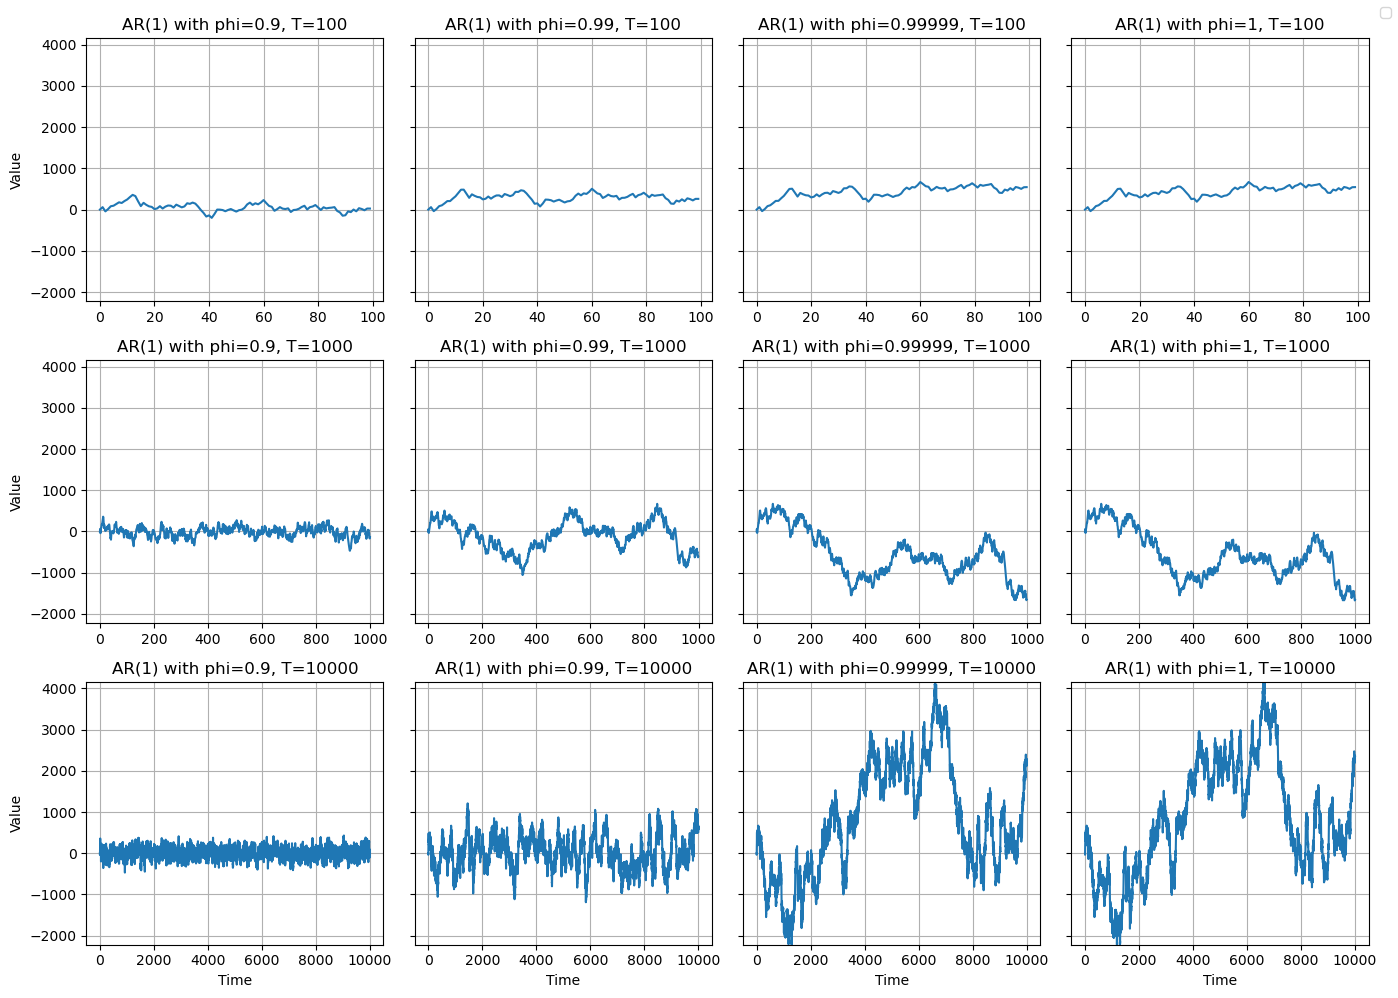

In [23]:
et=np.random.uniform(-100,100,sample_sizes[-1])
sample_mean=pd.DataFrame(index=sample_sizes,columns=phis)
sample_std=pd.DataFrame(index=sample_sizes,columns=phis)
# Initialize plot
fig, axs = plt.subplots(len(sample_sizes),len(phis),figsize=(14, 10), sharey=True)
for i, T in enumerate(sample_sizes):
    for j, phi in enumerate(phis):
        xt = simulate_ar1(phi, T)
        sample_mean.loc[T,phi]=np.mean(xt)
        sample_std.loc[T,phi]=np.std(xt)
        axs[i, j].plot(xt)
        axs[i, j].set_title(f'AR(1) with phi={phi}, T={T}')
        axs[i, j].grid(True)
        axs[i,j].set_ylim(min(xt),max(xt))
        if i == len(sample_sizes) - 1:
            axs[i, j].set_xlabel('Time')
        if j == 0:
            axs[i, j].set_ylabel('Value')

# Show legends and plot
handles, labels = axs[-1, -1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.show()

#### 7
What if $e_t$ follows Cauchy distribution?

Extreme Observations: The AR(1) process would likely exhibit more extreme observations (spikes or drops) that could persist over time due to the autoregressive nature of the process. This can make the time series appear more volatile.

Undefined Mean and Variance: The Cauchy distribution does not have a defined mean or variance. As a result, the AR(1) process would not stabilize around a long-run mean, and the sample paths would not converge to a steady state. This makes statistical analysis of the mean and variance of the process problematic.

Implications for Forecasting: The presence of heavy-tailed noise makes forecasting more challenging, as the predictive intervals would need to account for the potential of extreme values.

Potential Non-stationarity: Although an AR(1) process with $|\phi|<1$ is typically stationary, the heavy tails of the Cauchy distribution can lead to properties that resemble non-stationarity, where shocks have long-lasting effects on the future values of the process.


In [19]:
import yfinance as yf
ticker = ['^GSPC'] 
today='2024-03-24'
sp500 = yf.download(ticker, 
                      start='1900-1-1', 
                      end=today, 
                      progress=False)
sp500_month=sp500.resample('M').last()
sp500_year=sp500.resample('Y').last()

In [17]:
import pandas_datareader.data as web
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import quandl
import numpy as np
symbol = 'MULTPL/SP500_DIV_YIELD_MONTH'

df = web.DataReader(symbol, 'quandl', 
                               start='1881-01-01', 
                               end='2024-03-24', 
                               api_key='E47J_w_Tb6FmFjUZTRn6').iloc[::-1]


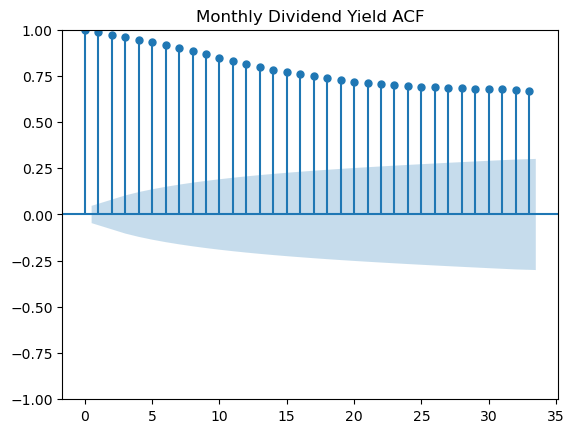

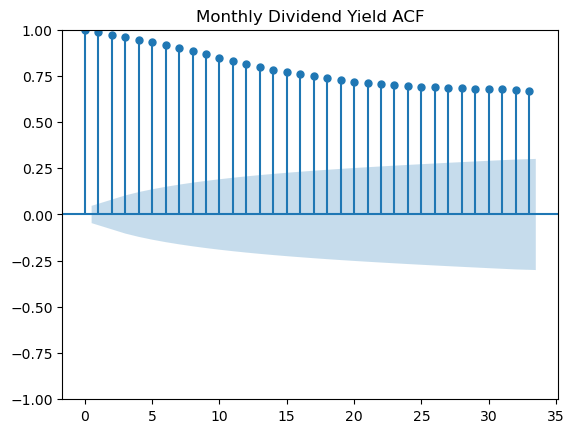

In [21]:
plot_acf(df, title='Monthly Dividend Yield ACF')

In [23]:
ljung_box_monthly = acorr_ljungbox(df, lags=[10])

In [24]:
ljung_box_monthly

,lb_stat,lb_pvalue
10,14950.937817,0.0


In [43]:
symbol='MULTPL/SP500_DIV_YIELD_YEAR'
df = web.DataReader(symbol, 'quandl', 
                               start='1881-01-01', 
                               end='2024-03-24', 
                               api_key='E47J_w_Tb6FmFjUZTRn6').iloc[::-1]

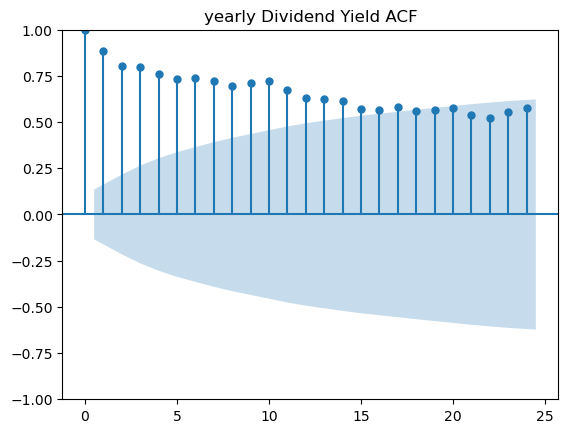

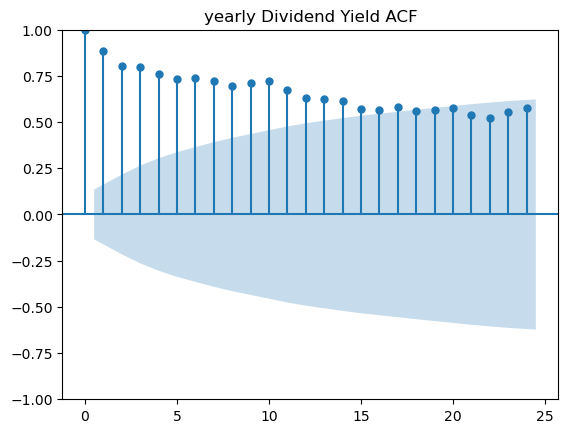

In [44]:
plot_acf(df, title='yearly Dividend Yield ACF')

In [27]:
ljung_box_yearly = acorr_ljungbox(df, lags=[10])

In [28]:
ljung_box_yearly

,lb_stat,lb_pvalue
10,1263.670367,2.644990e-265


#### Monthly Dividend Yield ACF:

1.As expected, because the series is perfectly correlated with itself at lag 0.<br>
2.There is a strong positive autocorrelation that gradually decreases as the lags increase. This indicates a persistent pattern where past values have a significant positive influence on future values in the monthly series.

#### Yearly Dividend Yield ACF:

1.Similar to the monthly ACF, the yearly ACF also exhibits a gradual decrease in autocorrelation as the lags increase.<br>
2.The yearly autocorrelation seems to fall between the confidence interval after lags=18, namely 18 years.